In [55]:
import pandas as pd
import matplotlib.pyplot as plt


In [56]:
# Fonction pour abréger les noms des paramètres
def abbreviate_param(param):
    # Extraire le numéro du paramètre (2, 3, etc.)
    parts = param.split('_')
    return f"PARAM_{parts[2]}"  # On prend la 3ème partie qui contient le chiffre


# Fonction pour vérifier si une annotation est trop proche d'une autre
def is_too_close(current_y, annotated_points, threshold=0.05):
    return any(abs(current_y - y) < threshold for y in annotated_points)



# Fonction pour tracer le graphique d'une primitive donnée
def plot_primitive(df,primitive_name, threshold=0.05):
    """
    Tracer le graphique d'une primitive donnée
    Args:
        df (pd.DataFrame): Le dataframe contenant les données
        primitive_name (str): Le nom de la primitive à tracer
        threshold (float): Le seuil de distance entre les annotations (par défaut 0.05)
    """
    subset = df[df['Primitive'] == primitive_name]
    
    if subset.empty:
        print(f"No data found for primitive: {primitive_name}")
        return
    
    # Tracer chaque variante dans un même graphique
    variants = subset['Variants'].unique()
    
    plt.figure()
    annotated_points = []  # Pour garder une trace des positions annotées

    for variant in variants:
        sub_variant = subset[subset['Variants'] == variant]
        plt.plot(sub_variant['Short_Parameters'], sub_variant['Time (ms)'], label=variant, marker='o')
        
        # Ajouter les annotations des valeurs des temps sur les points avec vérification
        for i, row in sub_variant.iterrows():
            current_y = row['Time (ms)']
            if not is_too_close(current_y, annotated_points, threshold=threshold):  # Ajuster le seuil si nécessaire
                plt.text(row['Short_Parameters'], current_y, f"{current_y:.2f}", 
                         fontsize=9, ha='right', va='bottom')
                annotated_points.append(current_y)  # Ajouter l'annotation à la liste des positions annotées
        
    plt.xticks(rotation=45)
    plt.title(f'Temps d\'exécution pour {primitive_name}')
    plt.xlabel('Paramètres')
    plt.ylabel('Temps (ms)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


def read_csv(file_path):
    df = pd.read_csv(file_path)
    df['Short_Parameters'] = df['Parameters'].apply(abbreviate_param)
    return df

def plot_packing_time_vs_k(data, k_min=None, k_max=None):
    """
    Plots the graph of time vs k for different primitives within a specified range.

    Parameters:
    data (dict): A dictionary containing the CSV data.
    k_min (float, optional): The minimum value of k to include in the plot.
    k_max (float, optional): The maximum value of k to include in the plot.
    """
    # Create DataFrame
    df = pd.DataFrame(data)

    # Filter the DataFrame based on the k range
    if k_min is not None:
        df = df[df['k'] >= k_min]
    if k_max is not None:
        df = df[df['k'] <= k_max]

    # Plot the data
    plt.figure(figsize=(10, 6))
    
    # Paramètre de la primitive
    param = df['Parameters'].unique()[0]

    # Plot for 'packing_one_lwe_to_glwe'
    plt.plot(df[df['Primitive'] == 'packing_one_lwe_to_glwe']['k'], 
             df[df['Primitive'] == 'packing_one_lwe_to_glwe']['Time (ms)'], 
             label='packing_one_lwe_to_glwe', marker='o')

    # Plot for 'packing_lwe_to_glwe'
    plt.plot(df[df['Primitive'] == 'packing_lwe_to_glwe']['k'], 
             df[df['Primitive'] == 'packing_lwe_to_glwe']['Time (ms)'], 
             label='packing_lwe_to_glwe', marker='x')

    # Add labels and title
    plt.xlabel('k')
    plt.ylabel('Time (ms)')
    plt.title(f'Packing for {param}')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()




In [57]:
# Charger les données depuis le fichier CSV
# df_all = read_csv("../exports/benchmark_results.csv")
# df_lwe_to_glwe = read_csv("../exports/packing_lwe_to_glwe.csv")
# df_one_lwe_to_glwe = read_csv("../exports/packing_one_lwe_to_glwe.csv")
df = read_csv("../exports/packing_lwe_to_glwe_full.csv")

In [58]:
df


,Primitive,Variants,Parameters,Time (ms),Short_Parameters
0,packing_lwe_to_glwe,xLWE,PARAM_MESSAGE_2_CARRY_0,48.336274,PARAM_2
1,packing_lwe_to_glwe,tLWE,PARAM_MESSAGE_2_CARRY_0,0.989614,PARAM_2
2,packing_lwe_to_glwe,xLWE,PARAM_MESSAGE_3_CARRY_0,165.042197,PARAM_3
3,packing_lwe_to_glwe,tLWE,PARAM_MESSAGE_3_CARRY_0,2.192806,PARAM_3
4,packing_lwe_to_glwe,xLWE,PARAM_MESSAGE_4_CARRY_0,507.872068,PARAM_4
5,packing_lwe_to_glwe,tLWE,PARAM_MESSAGE_4_CARRY_0,4.979372,PARAM_4
6,packing_lwe_to_glwe,xLWE,PARAM_MESSAGE_5_CARRY_0,2686.058048,PARAM_5
7,packing_lwe_to_glwe,tLWE,PARAM_MESSAGE_5_CARRY_0,13.807687,PARAM_5
8,packing_lwe_to_glwe,xLWE,PARAM_MESSAGE_6_CARRY_0,13139.701153,PARAM_6
9,packing_lwe_to_glwe,tLWE,PARAM_MESSAGE_6_CARRY_0,40.981099,PARAM_6


In [59]:
# print les primitives disponibles
print(df_all['Primitive'].unique())



['blind_rotate' 'packing_lwe_to_glwe' 'packing_one_lwe_to_glwe'
 'extract_lwe_sample_from_glwe_ciphertext' 'keyswitch_lwe_ciphertext']


In [60]:
# Exemple d'utilisation
# plot_primitive(df_lwe_to_glwe, "packing_lwe_to_glwe", threshold=1)
# plot_primitive(df_one_lwe_to_glwe, "packing_one_lwe_to_glwe", threshold=0.1)


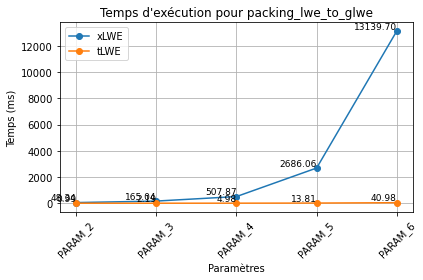

In [61]:
plot_primitive(df, "packing_lwe_to_glwe", threshold=0.1)


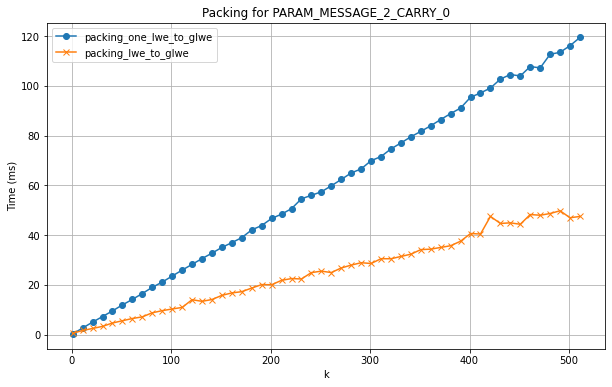

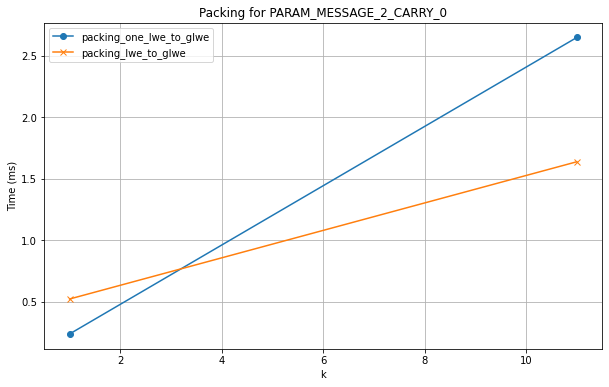

In [62]:
df_packing_2 = read_csv("../exports/benchmark_packing_2.csv")
plot_packing_time_vs_k(df_packing_2)
plot_packing_time_vs_k(df_packing_2,k_min=1,k_max=20)



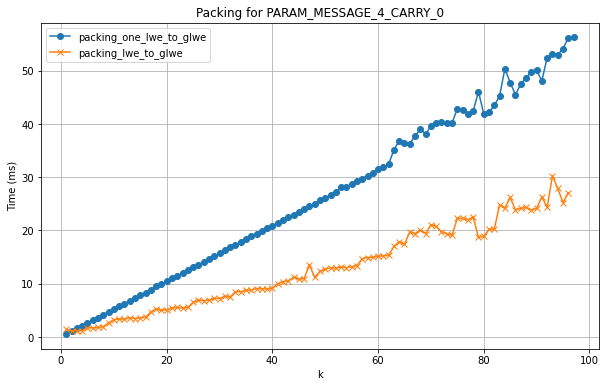

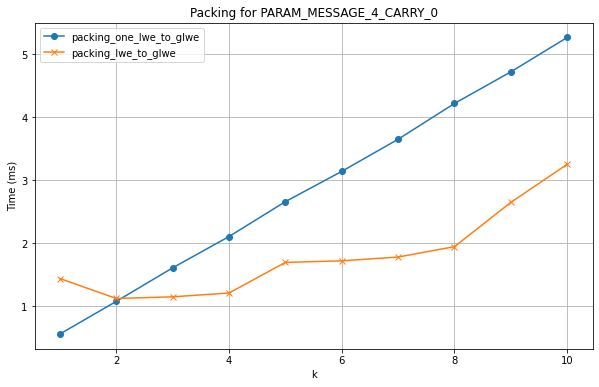

In [63]:
df_packing_4 = read_csv("../exports/benchmark_packing_4.csv")
plot_packing_time_vs_k(df_packing_4)
plot_packing_time_vs_k(df_packing_4,k_min=1,k_max=10)



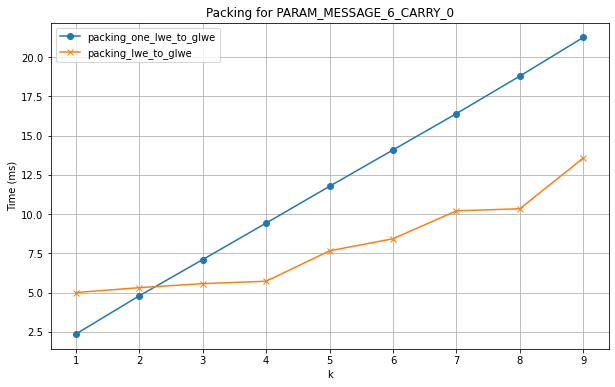

In [64]:
df_packing_6 = read_csv("../exports/benchmark_packing_6.csv")
plot_packing_time_vs_k(df_packing_6)


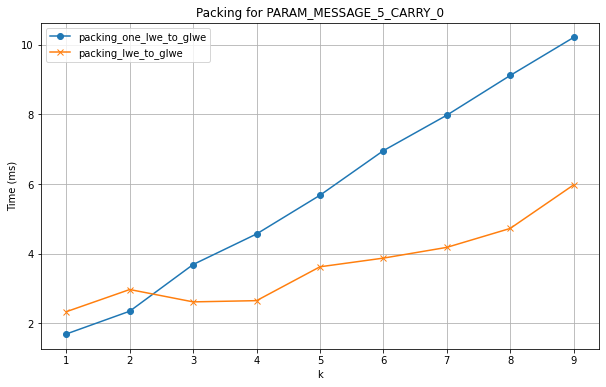

In [65]:
df_packing_5 = read_csv("../exports/benchmark_packing_5.csv")
plot_packing_time_vs_k(df_packing_5)


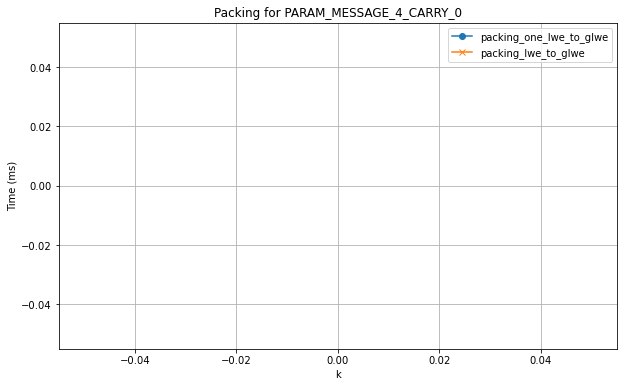

In [69]:
df_packing_lut_4 = read_csv("../exports/benchmark_packing_lut_4.csv")
plot_packing_time_vs_k(df_packing_lut_4, k_min=1, k_max=16)